In [4]:
import sys
# на уровень выше из research_rank/
sys.path.insert(0, '..')
from pathlib import Path
import numpy as np
import pandas as pd
import json
from collections import defaultdict
from plot_json import convert_dictlist_to_matrix
import matplotlib.pyplot as plt

Зписываем в data_matrix_r и data_matrix_s данные, где при нахождении вероятностей с помощью нашего метода MLE использовались ранги r = 3 и r = s = 1(для Фёдорова) соответственно.

In [3]:
# открывыю из файла который восстанавливался для матриц с данным рангом
with open("json_file/dicts_matrix/fix_matrix_r_notfix_z_with_x_min_max.json", "r") as json_file:
    data_matrix_r_1 = []
    # Чтение файла построчно
    for line in json_file:
        if line.strip():  # Пропуск пустых строк
            data_matrix_r_1.append(json.loads(line))  # Парсим каждый объект JSON

# открывыю из файла который восстанавливался для матриц с максимальным рангом
with open("json_file/dicts_matrix/fix_matrix_r_notfix_z_with_x_min_max.json", "r") as json_file:
    data_matrix_r_3 = []
    # Чтение файла построчно
    for line in json_file:
        if line.strip():  # Пропуск пустых строк
            data_matrix_r_3.append(json.loads(line))  # Парсим каждый объект JSON

## Рассмотрим S_{cvx} и Fidelity

Построим три графика, которые зависят от количества измерений в протоколе. По оси Y:\
у первого - $s_{cvx}$;\
у второго - fidelity между рандомной начальной матрицей плотности и восстановленной матрицей плотности;\
у третьего - fidelity между $\rho_{max}$ и $\rho_{min}$;

Для нашего ранга(r = 1)

In [1]:
from Qutrit import*
import seaborn as sns
from Adaptive_compresive_cending_qutrit import*
tomography_1 = ACT(oper_fedorov_basis, 1, 3)
m = [3,7,11,15,19,23,27,31,35,39]

for j in m:
    matrix_str = convert_dictlist_to_matrix(data_matrix_r_1[j]["density_matrix"])
    parametrs = data_matrix_r_1[j]["parameters"]
    s_cvx_list = np.array(parametrs["Svx"]) 
    N = np.array(parametrs["Number of iterations"]) 
    x_min_list = [[convert_dictlist_to_matrix(element[0]), convert_dictlist_to_matrix(element[1]), convert_dictlist_to_matrix(element[2])] for element in np.array(parametrs["X_min"])]
    x_max_list = [[convert_dictlist_to_matrix(element[0]), convert_dictlist_to_matrix(element[1]), convert_dictlist_to_matrix(element[2])]  for element in np.array(parametrs["X_max"])] 
    fidelity_list_xmax_xmin = [[tomography_1.Fidelity(x_min_list[ind][0], x_max_list[ind][0]), tomography_1.Fidelity(x_min_list[ind][1], x_max_list[ind][1]), tomography_1.Fidelity(x_min_list[ind][2], x_max_list[ind][2])] for ind in range(len(x_max_list))]
    
    # print("S_cvx with esp = 10^-5 :", np.mean(np.array(s_cvx_list),axis = 0) )
    # print("std_S_cvx with esp = 10^-5 :", np.std(np.array(s_cvx_list),axis = 0) )
 
    matrix_complex = np.array([[complex(cell) for cell in row] for row in matrix_str])
    s_cvx = np.max(np.array(s_cvx_list),axis = 0)
    # s_cvx_std = np.std(np.array(s_cvx_list),axis = 0)
    fidelity_xmax_xmin = np.min(np.array(fidelity_list_xmax_xmin),axis = 0)
    # fidelity_xmax_xmin_std = np.std(np.array(fidelity_list_xmax_xmin),axis = 0)
    fig, subfigs = plt.subplots(1, 3, figsize=(15, 4))  # Размер фигуры
    x = [1,2,3]
    for i, ax in enumerate(subfigs.flat):
        match i:
            case 0:       
                ax.errorbar(x, s_cvx, 
                            fmt='o',   # стиль маркера (кружки)
                            color='blue', 
                            markersize=3)
                # Дополнительная тонкая линия, соединяющая точки (опционально)
                ax.plot(x, s_cvx, color='blue', alpha=0.3, linestyle='--', linewidth=1)
                ax.set_title(r'Максимальное значение $S_{\mathrm{cvx}}$ для каждой точки')
                ax.set_xlabel('Количество измерений')
                ax.set_ylabel(r'$S_{\mathrm{cvx}}$')
                ax.set_ylim(-0.1, 1.1)
                ax.set_xlim(1, len(x)+0.2)
                ax.set_xticks([1, 2, 3])
                ax.tick_params(axis='x', direction='in')
                ax.grid(True)

            case 1:
                ax.errorbar(x, fidelity_xmax_xmin, 
                            fmt='o',            # стиль маркера (кружки)
                            color='green',
                            markersize=3)
                            # yerr=fidelity_xmax_xmin_std,  # вертикальные погрешности
                            # capsize=4,          # размер "шапочки" погрешности
                            # label='Fidelity ± std'
                # Дополнительная тонкая линия, соединяющая точки (как в исходном коде)
                ax.plot(x, fidelity_xmax_xmin, color='green', alpha=0.3, linestyle='--', linewidth=1)
                ax.set_title(r"Минимальное значени Fidelity для каждой точки")
                ax.set_xlabel('Количество измерений')
                ax.set_ylabel('Fidelity')
                ax.set_ylim(-0.1, 1.1)
                ax.set_xlim(1, len(x) + 0.2)
                ax.set_xticks([1, 2, 3])
                ax.tick_params(axis='x', direction='in')
                ax.grid(True)
        
            case 2:
                # Рисуем violin plot
                # sns.violinplot(y=s_cvx_list[:,-1], color="skyblue")
                sns.boxplot(y=s_cvx_list[:,-1], color="lightblue", width=0.3)


                # Настройка осей и заголовка
                ax.set_title('Violin Plot с настройкой осей', fontsize=14)
                ax.set_xlabel('Группы', fontsize=12)
                ax.set_ylabel('Значения', fontsize=12)

                # Настройка тиков внутрь (как в вашем предыдущем вопросе)
                ax.tick_params(axis='both', direction='in', length=6, width=1)
        



        ax.set_xlabel('Количество измерений')
        # ax.set_ylim(0, 1)
        # ax.set_xlim((1, 3.2))
        ax.grid(True)
        # ax.legend()
    plt.suptitle(f'Graphs for fixed the density matrix {np.floor(j/4)+1} with N = {N} ')
    plt.tight_layout()  # Для добавления пространства под заголовком
    plt.show()

ModuleNotFoundError: No module named 'Qutrit'

Для максимального ранга(r = 3)

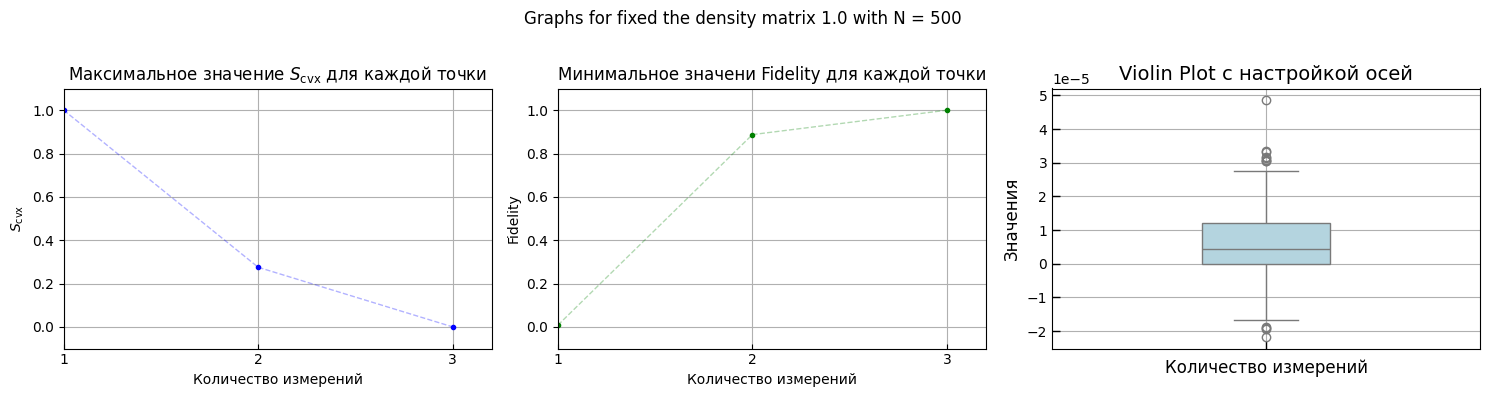

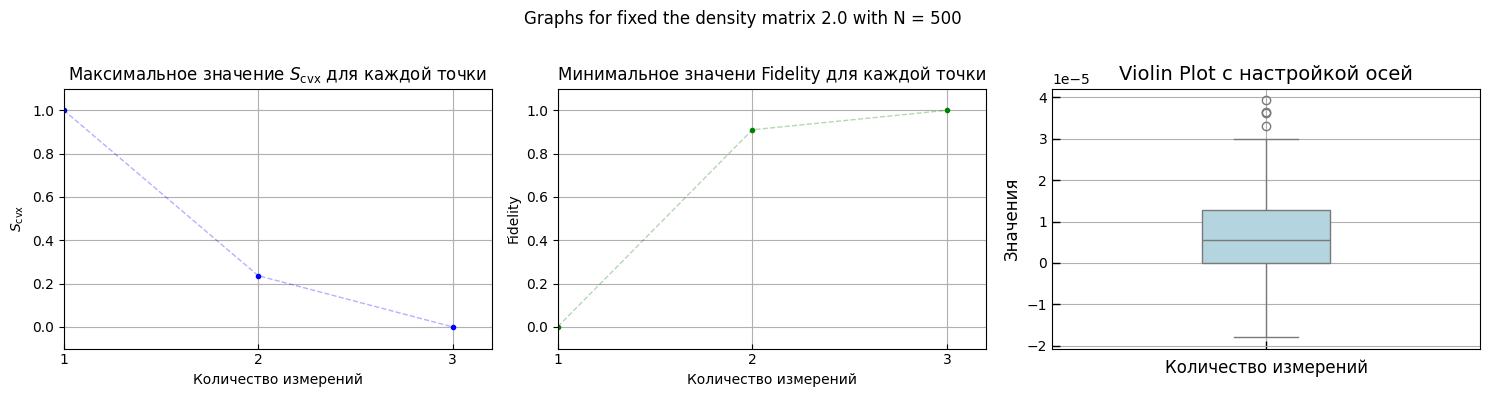

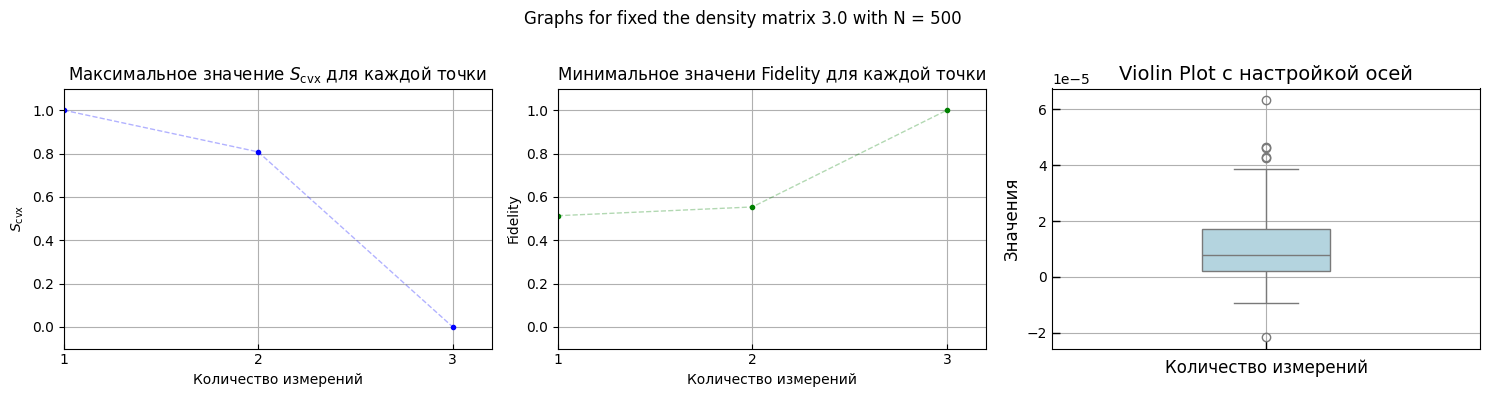

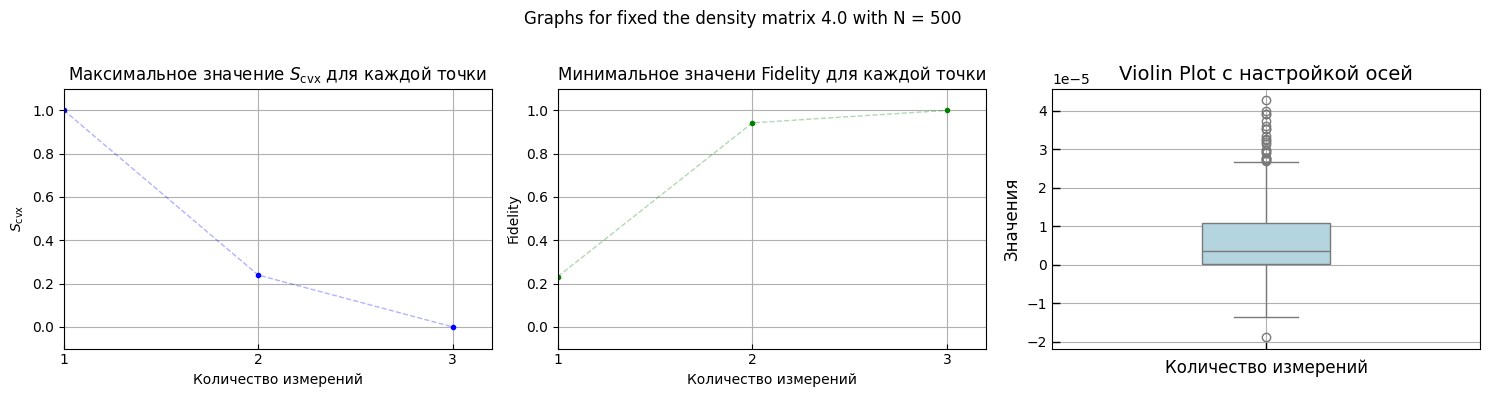

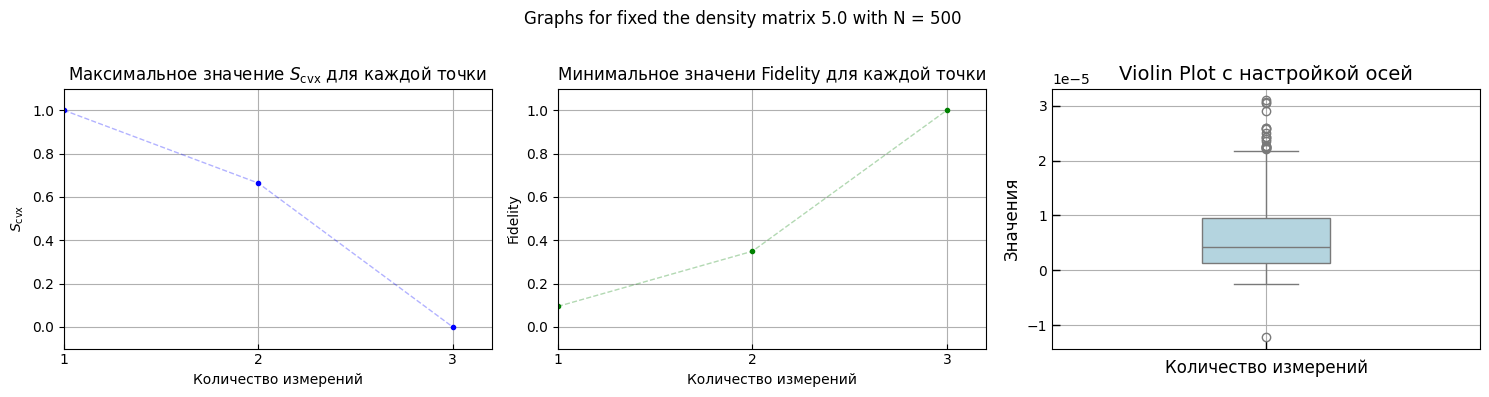

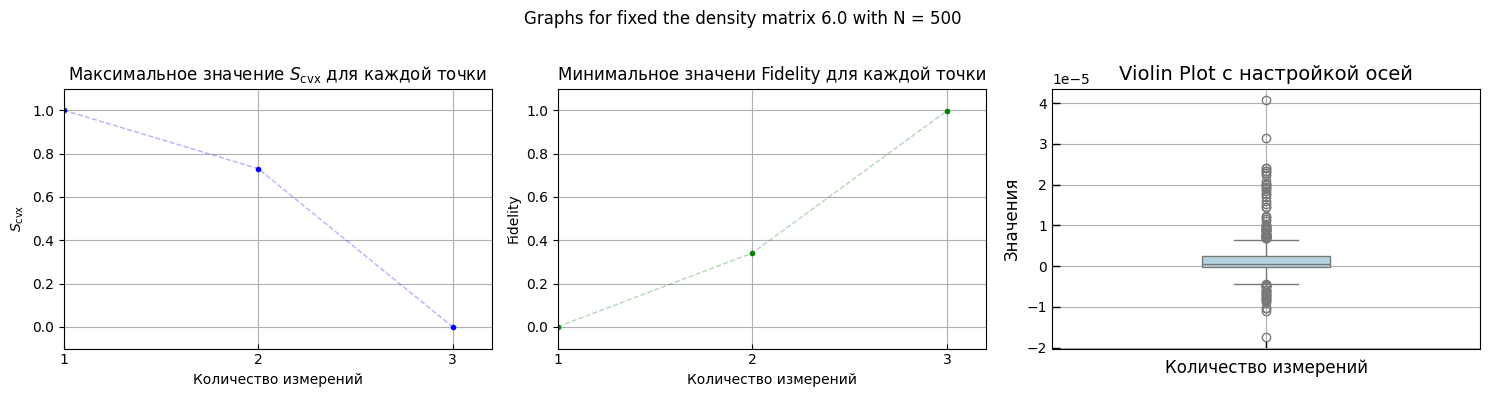

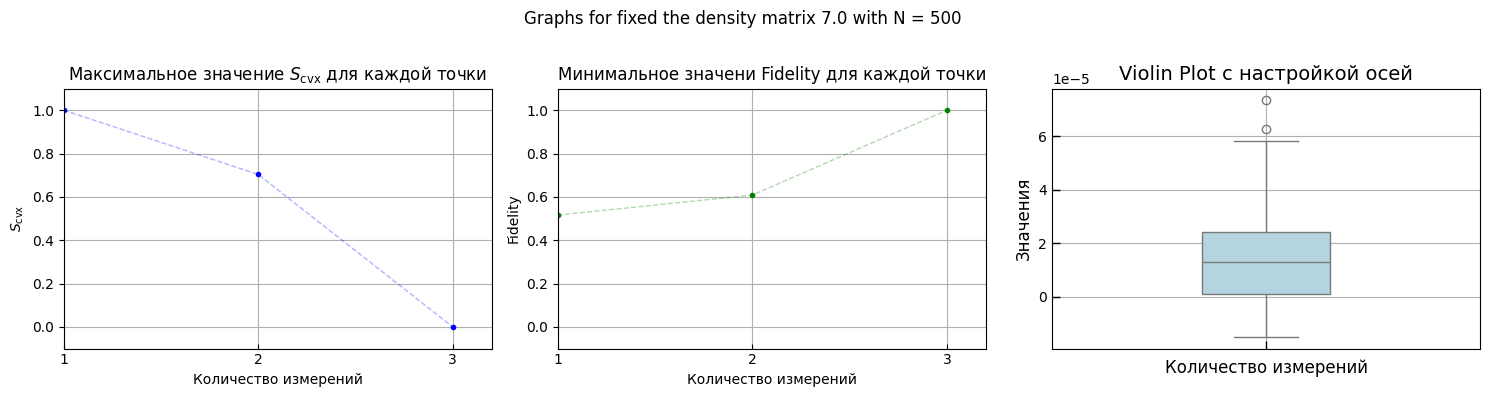

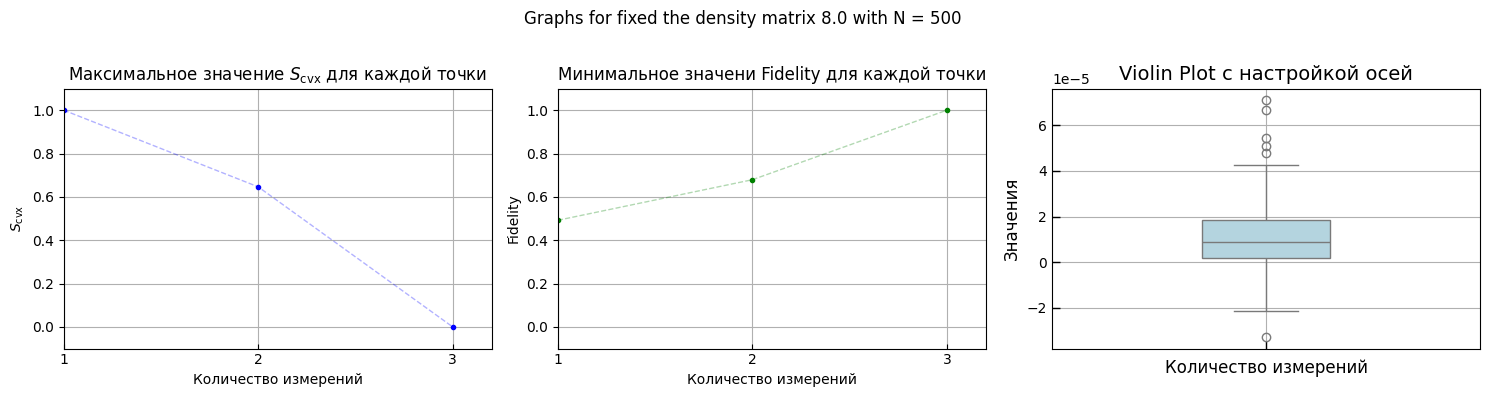

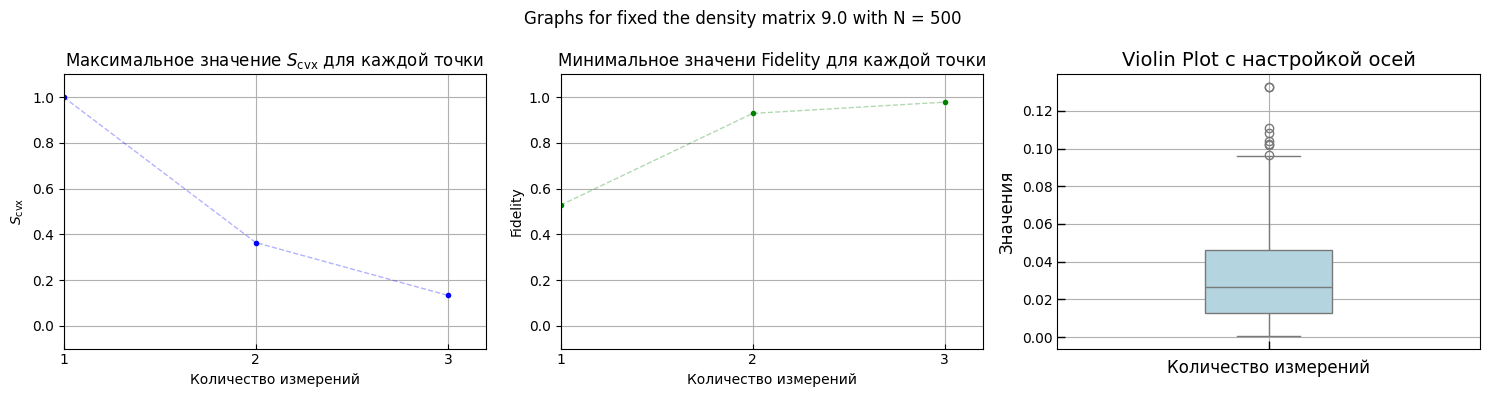

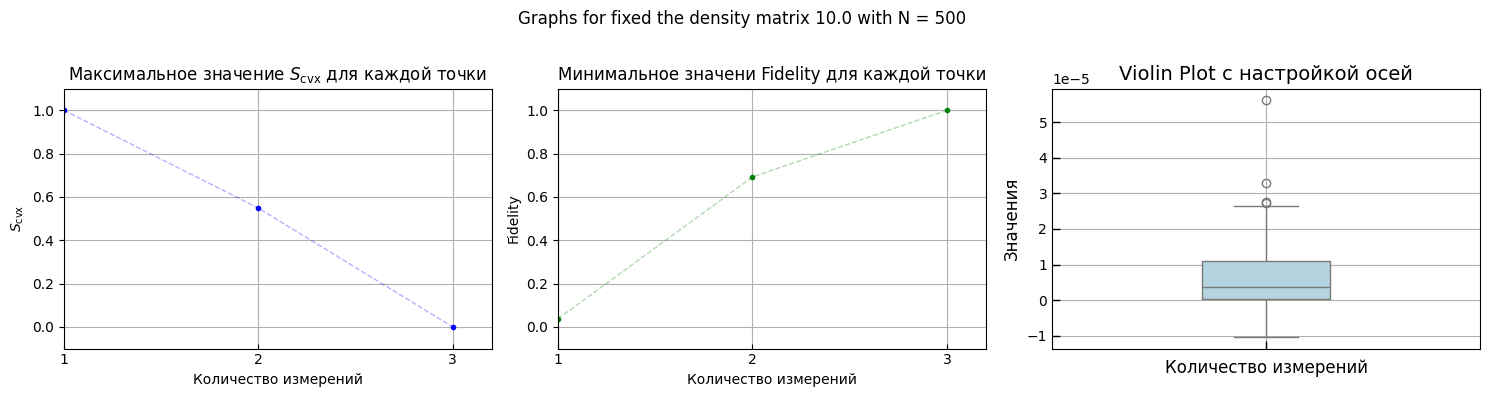

In [ ]:
from Qutrit import*
import seaborn as sns
from Adaptive_compresive_cending_qutrit import*
tomography_1 = ACT(oper_fedorov_basis, 1, 3)
m = [3,7,11,15,19,23,27,31,35,39]

for j in m:
    matrix_str = convert_dictlist_to_matrix(data_matrix_r_3[j]["density_matrix"])
    parametrs = data_matrix_r_3[j]["parameters"]
    s_cvx_list = np.array(parametrs["Svx"]) 
    N = np.array(parametrs["Number of iterations"]) 
    x_min_list = [[convert_dictlist_to_matrix(element[0]), convert_dictlist_to_matrix(element[1]), convert_dictlist_to_matrix(element[2])] for element in np.array(parametrs["X_min"])]
    x_max_list = [[convert_dictlist_to_matrix(element[0]), convert_dictlist_to_matrix(element[1]), convert_dictlist_to_matrix(element[2])]  for element in np.array(parametrs["X_max"])] 
    fidelity_list_xmax_xmin = [[tomography_1.Fidelity(x_min_list[ind][0], x_max_list[ind][0]), tomography_1.Fidelity(x_min_list[ind][1], x_max_list[ind][1]), tomography_1.Fidelity(x_min_list[ind][2], x_max_list[ind][2])] for ind in range(len(x_max_list))]
    
    # print("S_cvx with esp = 10^-5 :", np.mean(np.array(s_cvx_list),axis = 0) )
    # print("std_S_cvx with esp = 10^-5 :", np.std(np.array(s_cvx_list),axis = 0) )
 
    matrix_complex = np.array([[complex(cell) for cell in row] for row in matrix_str])
    s_cvx = np.max(np.array(s_cvx_list),axis = 0)
    # s_cvx_std = np.std(np.array(s_cvx_list),axis = 0)
    fidelity_xmax_xmin = np.min(np.array(fidelity_list_xmax_xmin),axis = 0)
    # fidelity_xmax_xmin_std = np.std(np.array(fidelity_list_xmax_xmin),axis = 0)
    fig, subfigs = plt.subplots(1, 3, figsize=(15, 4))  # Размер фигуры
    x = [1,2,3]
    for i, ax in enumerate(subfigs.flat):
        match i:
            case 0:       
                ax.errorbar(x, s_cvx, 
                            fmt='o',   # стиль маркера (кружки)
                            color='blue', 
                            markersize=3)
                # Дополнительная тонкая линия, соединяющая точки (опционально)
                ax.plot(x, s_cvx, color='blue', alpha=0.3, linestyle='--', linewidth=1)
                ax.set_title(r'Максимальное значение $S_{\mathrm{cvx}}$ для каждой точки')
                ax.set_xlabel('Количество измерений')
                ax.set_ylabel(r'$S_{\mathrm{cvx}}$')
                ax.set_ylim(-0.1, 1.1)
                ax.set_xlim(1, len(x)+0.2)
                ax.set_xticks([1, 2, 3])
                ax.tick_params(axis='x', direction='in')
                ax.grid(True)

            case 1:
                ax.errorbar(x, fidelity_xmax_xmin, 
                            fmt='o',            # стиль маркера (кружки)
                            color='green',
                            markersize=3)
                            # yerr=fidelity_xmax_xmin_std,  # вертикальные погрешности
                            # capsize=4,          # размер "шапочки" погрешности
                            # label='Fidelity ± std'
                # Дополнительная тонкая линия, соединяющая точки (как в исходном коде)
                ax.plot(x, fidelity_xmax_xmin, color='green', alpha=0.3, linestyle='--', linewidth=1)
                ax.set_title(r"Минимальное значени Fidelity для каждой точки")
                ax.set_xlabel('Количество измерений')
                ax.set_ylabel('Fidelity')
                ax.set_ylim(-0.1, 1.1)
                ax.set_xlim(1, len(x) + 0.2)
                ax.set_xticks([1, 2, 3])
                ax.tick_params(axis='x', direction='in')
                ax.grid(True)
        
            case 2:
                # Рисуем violin plot
                # sns.violinplot(y=s_cvx_list[:,-1], color="skyblue")
                sns.boxplot(y=s_cvx_list[:,-1], color="lightblue", width=0.3)


                # Настройка осей и заголовка
                ax.set_title('Violin Plot с настройкой осей', fontsize=14)
                ax.set_xlabel('Группы', fontsize=12)
                ax.set_ylabel('Значения', fontsize=12)

                # Настройка тиков внутрь (как в вашем предыдущем вопросе)
                ax.tick_params(axis='both', direction='in', length=6, width=1)
        



        ax.set_xlabel('Количество измерений')
        # ax.set_ylim(0, 1)
        # ax.set_xlim((1, 3.2))
        ax.grid(True)
        # ax.legend()
    plt.suptitle(f'Graphs for fixed the density matrix {np.floor(j/4)+1} with N = {N} ')
    plt.tight_layout()  # Для добавления пространства под заголовком
    plt.show()

## Рассмотрим собственные значения максимальной и минимальной матриц плотности 

### Создвём тамблицу с собственными значениями fed_max_r

Изучим ранг состояний ро_макс и ро_мин. Для начала рассмотрим это для протокола Фёдорова. Рассмотрим 500 различных квантовых состояний с разными рангами с точностью $\epsilon = 10^{-7}$

Для состояний восстановленных с рангом 1 создадим таблицу df_r_1

In [9]:
tomography_1 = ACT(oper_fedorov_basis, 1, 3)
x = np.array([1, 2, 3])
N = 500
svx_list = []         
rho_max_list = [0] * N
rho_min_list = [0] * N


fed_r1 = {
    "СЗ 1, И 1": [],
    "СЗ 2, И 1": [],
    "СЗ 3, И 1": []
}

# Создание DataFrame
df_r_1 = pd.DataFrame(fed_r1)
df_r_1[""] = np.nan
df_r_1["СЗ 1, И 2"] = []
df_r_1["СЗ 2, И 2"] = []
df_r_1["СЗ 3, И 2"] = []
df_r_1[" "] = np.nan
df_r_1["СЗ 1, И 3"] = []
df_r_1["СЗ 2, И 3"] = []
df_r_1["СЗ 3, И 3"] = []

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max, x_min_list, x_max_list, state_ml = tomography_1.main(epsilon=10**-7)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
        eigenvalues, eigenvectors = np.linalg.eig(x_max_list[ind_max])
        match ind_max:
            case 0:
                df_r_1.loc[len(df_r_1), ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 1:
                df_r_1.loc[len(df_r_1)-1, ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 2:
                df_r_1.loc[len(df_r_1)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])

  8%|▊         | 38/500 [00:06<00:55,  8.37it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 28%|██▊       | 139/500 [01:01<00:46,  7.75it/s] /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 37%|███▋      | 186/500 [01:40<00:52,  5.97it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 46%|████▋     | 232/500 [02:20<00:31,  8.6

Для состояния с рангом 2 создадим таблицу df_r_2

In [10]:
tomography_1 = ACT(oper_fedorov_basis, 2, 3)
x = np.array([1, 2, 3])
N = 500
svx_list = []         
rho_max_list = [0] * N
rho_min_list = [0] * N


fed_r1 = {
    "СЗ 1, И 1": [],
    "СЗ 2, И 1": [],
    "СЗ 3, И 1": []
}

# Создание DataFrame
df_r_2 = pd.DataFrame(fed_r1)
df_r_2[""] = np.nan
df_r_2["СЗ 1, И 2"] = []
df_r_2["СЗ 2, И 2"] = []
df_r_2["СЗ 3, И 2"] = []
df_r_2[" "] = np.nan
df_r_2["СЗ 1, И 3"] = []
df_r_2["СЗ 2, И 3"] = []
df_r_2["СЗ 3, И 3"] = []

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max, x_min_list, x_max_list, state_ml = tomography_1.main(epsilon=10**-7)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
        eigenvalues, eigenvectors = np.linalg.eig(x_max_list[ind_max])
        match ind_max:
            case 0:
                df_r_2.loc[len(df_r_2), ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 1:
                df_r_2.loc[len(df_r_2)-1, ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 2:
                df_r_2.loc[len(df_r_2)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])

100%|██████████| 500/500 [00:57<00:00,  8.75it/s]


Для состояния с рангом 3 создадим таблицу df_r_3

In [11]:
tomography_1 = ACT(oper_fedorov_basis, 3, 3)
x = np.array([1, 2, 3])
N = 500
svx_list = []         
rho_max_list = [0] * N
rho_min_list = [0] * N


fed_r1 = {
    "СЗ 1, И 1": [],
    "СЗ 2, И 1": [],
    "СЗ 3, И 1": []
}

# Создание DataFrame
df_r_3 = pd.DataFrame(fed_r1)
df_r_3[""] = np.nan
df_r_3["СЗ 1, И 2"] = []
df_r_3["СЗ 2, И 2"] = []
df_r_3["СЗ 3, И 2"] = []
df_r_3[" "] = np.nan
df_r_3["СЗ 1, И 3"] = []
df_r_3["СЗ 2, И 3"] = []
df_r_3["СЗ 3, И 3"] = []

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max, x_min_list, x_max_list, state_ml = tomography_1.main(epsilon=10**-7)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
        eigenvalues, eigenvectors = np.linalg.eig(x_max_list[ind_max])
        match ind_max:
            case 0:
                df_r_3.loc[len(df_r_3), ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 1:
                df_r_3.loc[len(df_r_3)-1, ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 2:
                df_r_3.loc[len(df_r_3)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])


100%|██████████| 500/500 [00:52<00:00,  9.56it/s]


Объединяем их в одну таблицу exel 

In [ ]:
# # Создаем пустые столбцы (3 штуки)
# empty_cols = pd.DataFrame(np.nan, index=df_r_1.index, columns=['   ', '    ', '  '])

# # Объединяем таблицы с пустыми столбцами между ними
# result = pd.concat([df_r_1, empty_cols, df_r_2, empty_cols, df_r_3], axis=1)

# # Запись в Excel
# result.to_excel("exel_file/fed_max_r.xlsx", index=False, startrow=2)

### Строим графики с этими собственными значениями

Для ранга 1

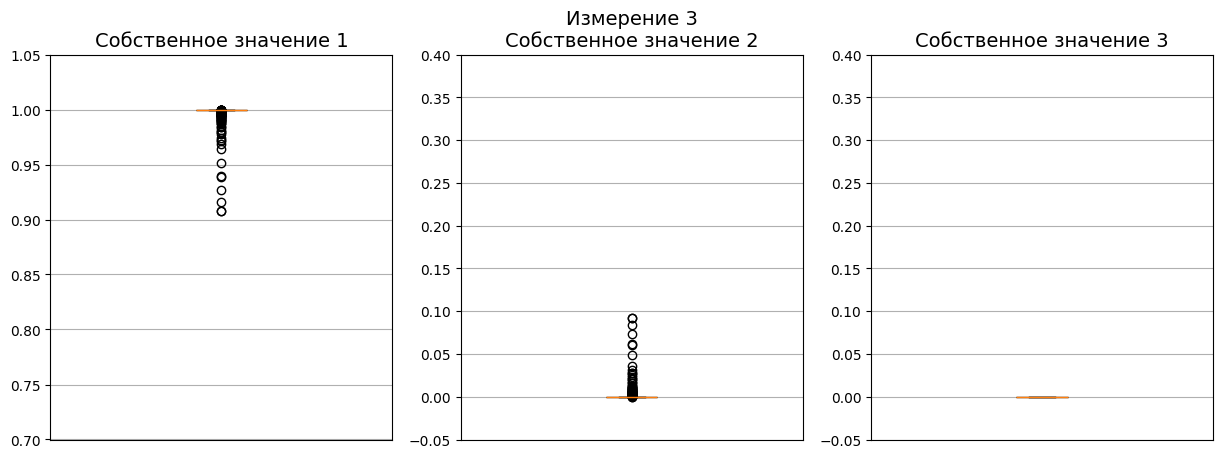

In [94]:
# Группируем колонки по измерениям (столбцы)
column_groups = [
    ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"],  # Измерение 1
    ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"],  # Измерение 2
    ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]   # Измерение 3
]

col_labels = ["СЗ 1", "СЗ 2", "СЗ 3"]
row_labels = ["Измерение 1", "Измерение 2", "Измерение 3"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(2,3):      # по измерениям (строки)
    for j in range(3):  # по СЗ (столбцы)
        ax = axes[j]
        col_name = column_groups[i][j]
        data = df_r_1[col_name].dropna()

        ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        
        # Заголовок для каждого графика — только название СЗ
        ax.set_title(f"Собственное значение {col_labels[j][3]}", fontsize=14)
        
        # Для центрального графика в строке (j == 1) добавляем подпись с измерением
        if j == 1:
            ax.set_title(f"{row_labels[i]}\nСобственное значение {col_labels[j][3]}", fontsize=14)
            

        if j == 0:
            ax.set_ylim([0.7, 1.05])
        else:
            ax.set_ylim([-0.05, 0.4])


        ax.grid(True)
        ax.set_xticks([])


# plt.tight_layout()
plt.show()


Для ранга 2

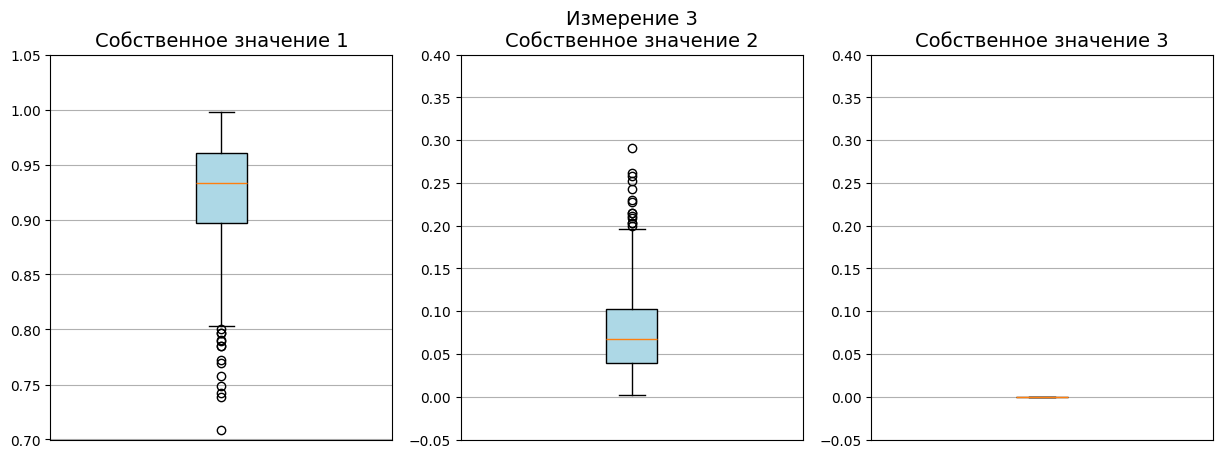

In [93]:
# Группируем колонки по измерениям (столбцы)
column_groups = [
    ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"],  # Измерение 1
    ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"],  # Измерение 2
    ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]   # Измерение 3
]

col_labels = ["СЗ 1", "СЗ 2", "СЗ 3"]
row_labels = ["Измерение 1", "Измерение 2", "Измерение 3"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(2,3):      # по измерениям (строки)
    for j in range(3):  # по СЗ (столбцы)
        ax = axes[j]
        col_name = column_groups[i][j]
        data = df_r_2[col_name].dropna()

        ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        
        # Заголовок для каждого графика — только название СЗ
        ax.set_title(f"Собственное значение {col_labels[j][3]}", fontsize=14)
        # Для центрального графика в строке (j == 1) добавляем подпись с измерением
        if j == 1:
            ax.set_title(f"{row_labels[i]}\nСобственное значение {col_labels[j][3]}", fontsize=14)
            

        if j == 0:
            ax.set_ylim([0.7, 1.05])
        else:
            ax.set_ylim([-0.05, 0.4])


        ax.grid(True)
        ax.set_xticks([])


# plt.tight_layout()
plt.show()

Для ранга 3

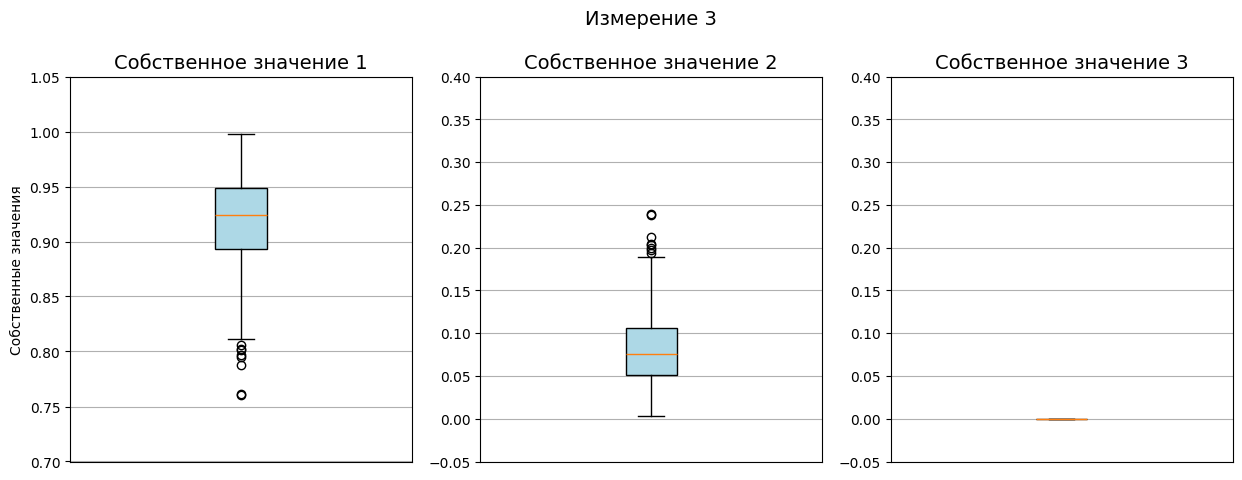

In [ ]:
# Группируем колонки по измерениям (столбцы)
column_groups = [
    ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"],  # Измерение 1
    ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"],  # Измерение 2
    ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]   # Измерение 3
]

col_labels = ["СЗ 1", "СЗ 2", "СЗ 3"]
row_labels = ["Измерение 1", "Измерение 2", "Измерение 3"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(2, 3):      # по измерениям (строки)
    for j in range(3):  # по СЗ (столбцы)
        ax = axes[j]
        col_name = column_groups[i][j]
        data = df_r_3[col_name].dropna()

        ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))

        # Заголовок для каждого графика — только название СЗ
        ax.set_title(f"Собственное значение {col_labels[j][3]}", fontsize=14)
        # Для центрального графика в строке (j == 1) добавляем подпись с измерением
        if j == 1:
            ax.set_title(f"{row_labels[i]}\n\nСобственное значение {col_labels[j][3]}", fontsize=14)
            

        if j == 0:
            ax.set_ylim([0.7, 1.05])
        else:
            ax.set_ylim([-0.05, 0.4])


        ax.grid(True)
        ax.set_xticks([])


# plt.tight_layout()
plt.show()